In [1]:
import warnings
from pylj import mc, sample, util
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [6]:
def mc_simulation(number_of_particles, temperature, box_length, number_of_steps, sample_frequency):
    # Creates the visualisation environment
    %matplotlib notebook
    # Initialise the system placing the particles on a square lattice
    system = mc.initialise(number_of_particles, temperature, box_length, 'square')
    # This sets the sampling class as Energy, which shows the energy of the system
    sample_system = sample.Energy(system)
    # Compute the energy of the system
    system.compute_energy()
    system.old_energy = system.energies.sum()
    # Add this energy to the energy sample array
    system.mc_sample()
    # Begin the monte carlo loop
    for i in range(0, number_of_steps):
        system.step += 1
        # Select a random particle to remove
        system.select_random_particle()
        # Select a random position to replace that particle
        system.new_random_position()
        # Compute the new energy of the system
        system.compute_energy()
        system.new_energy = system.energies.sum()
        # Assess the Metropolis condition
        if mc.metropolis(temperature, system.old_energy, system.new_energy):
            system.accept()
        else:
            system.reject()
        # Add this energy to the energy sample array
        system.mc_sample()
        # At a given frequency sample the positions and plot
        if system.step % sample_frequency == 0:
            sample_system.update(system)
    return system

The `mc_simulation` function takes five variables:
- The number of particles
- The simulation temperature (for the Metropolis condition)
- The simulation cell vector
- The number of steps
- The sampling frequency (how often the image is updated)

<IPython.core.display.Javascript object>


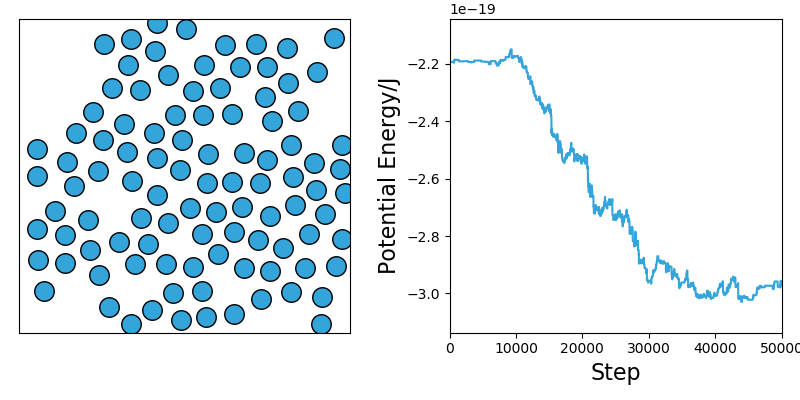

In [7]:
system = mc_simulation(100, 273.15, 45, 50000, 100)